In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet
from sklearn.metrics import r2_score,mean_squared_error
data=pd.read_pickle('AQI-FE1-Binarized.pkl')

In [2]:
dx=data[[ 'Month', 'Quarter', 'Dayofweek', 'HourofDay',
       'DayofMonth', 'Dayoftheyear', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'Sunday','T','ds']]


In [3]:

dx['y']=data['T'].copy()

/Users/mg/Documents/projects/projects/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [4]:
data.index.values

array(['2004-10-03T18:00:00.000000000', '2004-10-03T19:00:00.000000000',
       '2004-10-03T20:00:00.000000000', ...,
       '2005-04-04T12:00:00.000000000', '2005-04-04T13:00:00.000000000',
       '2005-04-04T14:00:00.000000000'], dtype='datetime64[ns]')

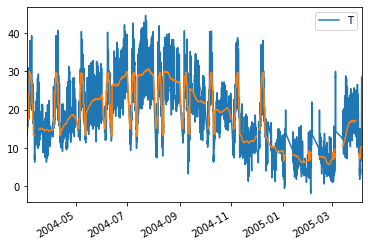

In [5]:
fig, ax = plt.subplots()
#finding trend using rolling window operation
dx1=dx['T'].rolling(window=365, center=True, min_periods=360).mean()
data.plot(y='T', ax=ax)
dx1.plot(ax=ax)

In [6]:
dx

,Month,Quarter,Dayofweek,HourofDay,DayofMonth,Dayoftheyear,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,T,ds,y
2004-10-03 18:00:00,10,4,6,18,3,277,0,0,0,0,0,0,0,13.6,2004-10-03 18:00:00,13.6
2004-10-03 19:00:00,10,4,6,19,3,277,0,0,0,0,0,0,0,13.3,2004-10-03 19:00:00,13.3
2004-10-03 20:00:00,10,4,6,20,3,277,0,0,0,0,0,0,0,11.9,2004-10-03 20:00:00,11.9
2004-10-03 21:00:00,10,4,6,21,3,277,0,0,0,0,0,0,0,11.0,2004-10-03 21:00:00,11.0
2004-10-03 22:00:00,10,4,6,22,3,277,0,0,0,0,0,0,0,11.2,2004-10-03 22:00:00,11.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,4,2,0,10,4,94,1,0,0,0,0,0,0,21.9,2005-04-04 10:00:00,21.9
2005-04-04 11:00:00,4,2,0,11,4,94,1,0,0,0,0,0,0,24.3,2005-04-04 11:00:00,24.3
2005-04-04 12:00:00,4,2,0,12,4,94,1,0,0,0,0,0,0,26.9,2005-04-04 12:00:00,26.9
2005-04-04 13:00:00,4,2,0,13,4,94,1,0,0,0,0,0,0,28.3,2005-04-04 13:00:00,28.3


In [7]:

m = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.1)
m.fit(dx)
future = m.make_future_dataframe(periods=1)
forecast = m.predict(future)
#m.plot_components(forecast)

In [8]:
ddx=dx.loc[:'2004-12-1']

In [9]:
ddx.index.max()

Timestamp('2004-11-30 23:00:00')

In [10]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

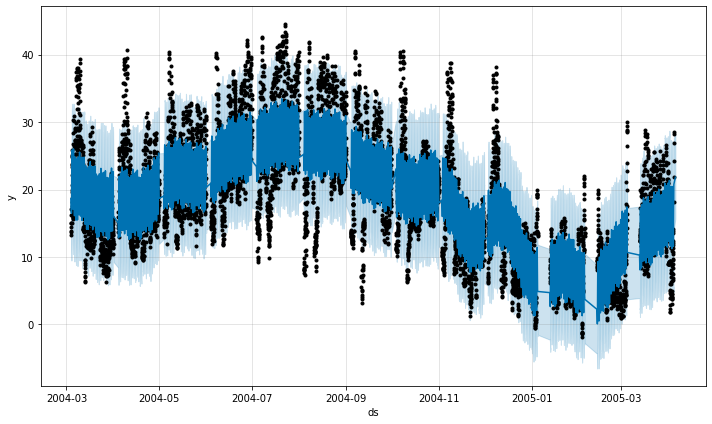

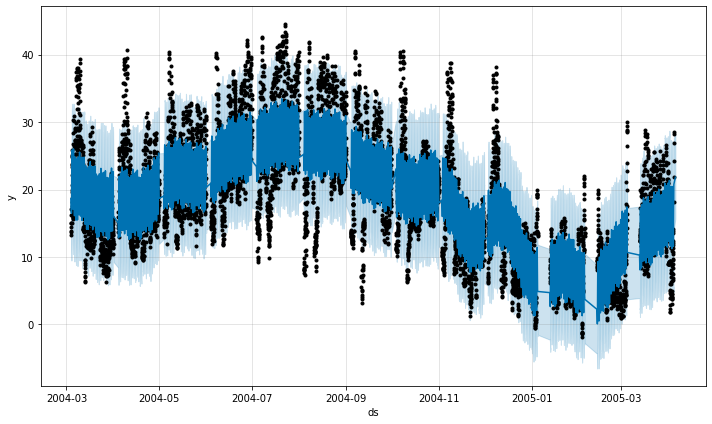

In [11]:
m.plot(forecast)

In [12]:
m1 = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.1)
m1.fit(ddx)
future1 = m1.make_future_dataframe(periods=90)
forecast1 = m1.predict(future1)
#m.plot_components(forecast)

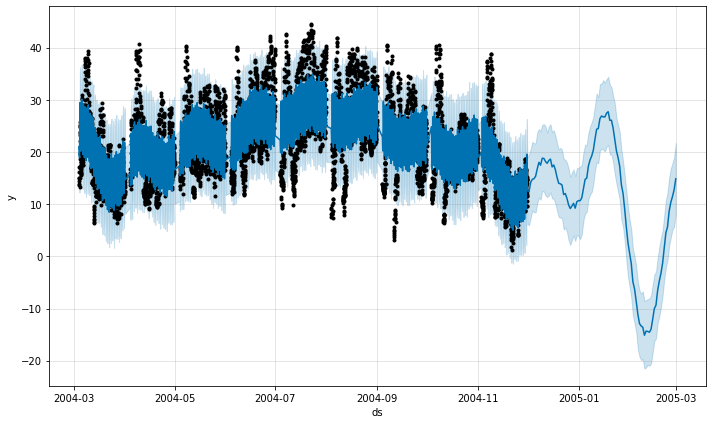

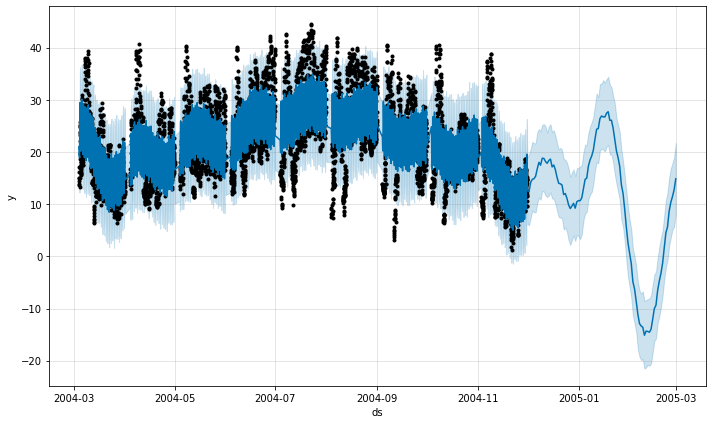

In [13]:
m1.plot(forecast1)

In [14]:

#ddpv=forecast1.loc[forecast1['ds'].loc["2004-12":].index]

#ddpv

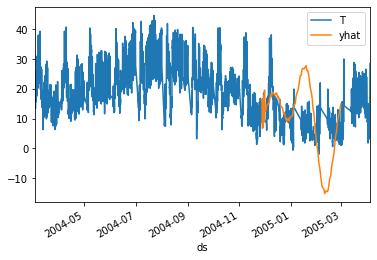

In [20]:
fig, ax = plt.subplots()
#finding trend using rolling window operation
dx1=dx['T'].rolling(window=365, center=True, min_periods=360).mean()
dx.plot(y='T', ax=ax)
ddpv=forecast1.loc[5900:]
ddpv.plot(ax=ax,x='ds',y='yhat')
#dx1.plot(ax=ax)

In [22]:
y_true=dx['y'].loc['2004-12-2':'2005-2-28']

In [23]:
y_true.size

1728

In [25]:
y_pred=forecast1['yhat'].loc[5900:]

In [26]:
y_pred.size

172